# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Описание проекта

Главная задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости, и ответить на вопросы:
- Как быстро продавались квартиры?
- Какие факторы больше всего влияют на общую (полную) стоимость объекта?
- Какие населённые пункты с самой высокой и низкой стоимостью квадратного метра?
- Как стоимость объектов зависит от расстояния до центра города?

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

Анализ будет выполнен на данных сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Для начала анализа необходимо ознакомиться с данными:

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np #импортируем необходимые библиотеки

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv') #читаем csv-файл и сохраняем в переменную data
data.head() #выведем первые 5 значений

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Все данные находятся в одном столбце, что говорит о том, что в данных присутствует разделитель. Повторно пробуем прочитать файл, но уже с указанным разделителем - "\t":

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #читаем csv-файл с разделителями 
#и повторно сохраняем в переменную data 
data.head() #проверяем по первым 5 значениям

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Теперь таблица выглядит корректно и мы можем ознакомиться с основной информацией датафрейма:

In [4]:
data.info() #выводим основную информацию о датафрейме 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Файл содержит следующие данные**:

`total_images` — число фотографий квартиры в объявлении

`last_price` — цена на момент снятия с публикации

`total_area` — общая площадь квартиры в квадратных метрах (м²)

`first_day_exposition` — дата публикации

`rooms` — число комнат

`ceiling_height` — высота потолков (м)

`floors_total` — всего этажей в доме

`living_area` — жилая площадь в квадратных метрах (м²)

`floor` — этаж

`is_apartment` — апартаменты

`studio` — квартира-студия (булев тип)

`open_plan` — свободная планировка (булев тип)

`kitchen_area` — площадь кухни в квадратных метрах (м²)

`balcony` — число балконов

`locality_name` — название населённого пункта

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

`cityCenters_nearest` — расстояние до центра города (м)

`parks_around3000` — число парков в радиусе 3 км

`parks_nearest` — расстояние до ближайшего парка (м)

`ponds_around3000` — число водоёмов в радиусе 3 км

`ponds_nearest` — расстояние до ближайшего водоёма (м)

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

**Всего 23699 строк, построим общую гистограмму для всех столбцов таблицы:**

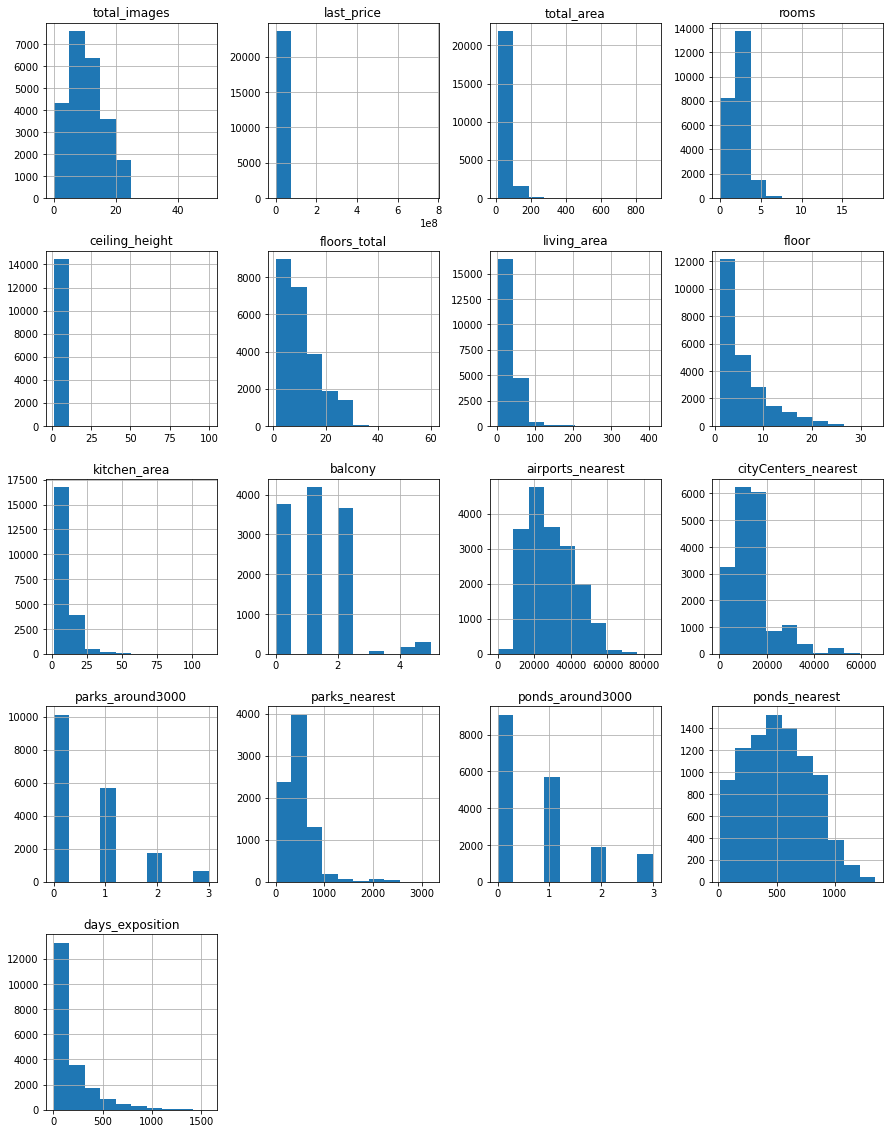

In [5]:
data.hist(figsize=(15, 20)); #построение гистограмм

### Предобработка данных

#### Удаление пропусков
Для начала предобработки выведем количество пропущенных значений для каждого столбца и их долю:

In [6]:
data.isna().sum().sort_values(ascending=False) #и отсортируем для удобства

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [7]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm') #посмотрим долю пропусков

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


В большинстве столбцов присутсвуют пустые значения. 
Начнем разбор с самой многочисленной группы - `is_apartment`(апартаменты).

Данная группа должна иметь булево значение, т.к. это качественный показатель. Проверим данное утверждение:

In [8]:
data['is_apartment'].unique() #выводим уникальные значения

array([nan, False, True], dtype=object)

Значения nan эквивалентны значению False, исходя из логики, что так много квартир не могут быть апартаментами, и исходя из того, что заполнение данных могло быть проигнорировано, по причине, что квартира не является апартаментами. Заменим все пустые значения на False:

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False) #замена с помощью
#метода fillna()
data['is_apartment'].isna().sum() #проверяем остались ли пустые значения

0

Значения столбцов `parks_nearest`, `ponds_nearest`, `balcony`, `airports_nearest`, `cityCenters_nearest`, `ponds_around3000`, `parks_around3000`, `days_exposition` имеют пустые значения, т.к. квартира в принципе может не иметь балкона, парка, аэропорта и т.д. Это же касается `days_exposition`, т.к. это дни от публикации до снятия, это может означать, что объявление не снято. В данных столбцах значения могут быть пустыми и такие пропуски следует заменить на 0.

In [10]:
data[['parks_nearest','ponds_nearest','balcony','airports_nearest','cityCenters_nearest','ponds_around3000', 'parks_around3000','days_exposition']] = \
data[['parks_nearest','ponds_nearest','balcony','airports_nearest','cityCenters_nearest','ponds_around3000', 'parks_around3000','days_exposition']].fillna(0)

Проверим, сколько значений все еще остаются пустыми

In [11]:
data.isna().sum().sort_values(ascending=False) #проверка наличия пустых значений в отсортированном порядке

ceiling_height          9195
kitchen_area            2278
living_area             1903
floors_total              86
locality_name             49
total_images               0
balcony                    0
ponds_nearest              0
ponds_around3000           0
parks_nearest              0
parks_around3000           0
cityCenters_nearest        0
airports_nearest           0
open_plan                  0
last_price                 0
studio                     0
is_apartment               0
floor                      0
rooms                      0
first_day_exposition       0
total_area                 0
days_exposition            0
dtype: int64

К счастью, квартир без потолков не бывает, поэтому столбец `ceiling_height`необходимо заполнить медианным значением.
Для этого проверим, нет ли аномальных значений:

In [12]:
data['ceiling_height'].unique() #выводим уникальные значения

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Значений слишком много, можно разделить их на категории. Согласно данным из интернета, по нормам потолки не могут быть меньше 2,5 м. Предела для максимальных потолков нет, но за максимальное значение тогда возьмем условные 20 м.
Проверим, какие значения выходят по слишком высоким потолкам.

In [13]:
max_ceiling_height = data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] #фильтруем значение в столбце
max_ceiling_height.unique() #выводим полученные уникальные данные

array([ 25. ,  32. ,  27. ,  24. ,  26. ,  20. ,  22.6,  27.5, 100. ])

Данные значения, вероятно, ошибочны, и исходя из знанания, что потолки не могут быть ниже 2,5 м, данные значения мы можем разделить на 10, что, в большинстве своем, приведет к среднему значению потолков. 

In [14]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 20, 'ceiling_height']/10
#производим математический расчет отфильтрованных значений
max_ceiling_height = data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] #создаем переменную для проверки
max_ceiling_height.unique() #выводим уникальные значения

array([], dtype=float64)

Значений больше 20 метров не осталось, но вероятно после обработки некоторые квартиры стали иметь экстремально низкие потолки. Далее проверим минимальные значения.

In [15]:
min_ceiling_height = data.loc[data['ceiling_height'] < 2.5, 'ceiling_height'] #фильтруем значение в столбце
min_ceiling_height.unique() #выводим полученные уникальные данные

array([2.47, 2.34, 2.  , 2.45, 2.46, 2.4 , 2.3 , 2.48, 1.2 , 2.2 , 1.75,
       2.25, 2.26, 2.49, 1.  ])

Их, как и пустые значения, придётся заменить на медианное значение.

In [16]:
data.loc[data['ceiling_height'] < 2.5, 'ceiling_height'] = data['ceiling_height'].median() 
#производим замену отфильрованных данных медианным значением
min_ceiling_height = data.loc[data['ceiling_height'] < 2.5, 'ceiling_height'] #создаем переменную для проверки
min_ceiling_height.unique()#выводим уникальные значения

array([], dtype=float64)

Наконец, мы можем заменить пустые значения:

In [17]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#производим замену пустых строк медианным значением
data['ceiling_height'].isna().sum() #проверяем остались ли пустые значения

0

Убеждаемся, что в столбце `ceiling_height` не осталось пустых значений и переходим к следующей группе с пропусками.

In [18]:
data.isna().sum().sort_values(ascending=False) #проверка наличия пустых значений в отсортированном порядке

kitchen_area            2278
living_area             1903
floors_total              86
locality_name             49
total_images               0
ponds_nearest              0
ponds_around3000           0
parks_nearest              0
parks_around3000           0
cityCenters_nearest        0
airports_nearest           0
balcony                    0
open_plan                  0
last_price                 0
studio                     0
is_apartment               0
floor                      0
ceiling_height             0
rooms                      0
first_day_exposition       0
total_area                 0
days_exposition            0
dtype: int64

Рассмотрим уникальные значения столбца `kitchen_area`:

In [19]:
data['kitchen_area'].unique() #выводим уникальные значения

array([ 25.  ,  11.  ,   8.3 ,    nan,  41.  ,   9.1 ,  14.4 ,  18.9 ,
         8.81,   6.5 ,   8.5 ,   6.  ,   9.  ,   5.2 ,   8.  ,   7.6 ,
         5.6 ,  12.  ,   5.7 ,   6.1 ,  19.6 ,  15.  ,   7.  ,   9.2 ,
        11.7 ,  13.4 ,  17.  ,   6.3 ,  11.6 ,   8.8 ,  10.  ,  17.6 ,
         7.5 ,   9.5 ,  50.  ,  15.5 ,  10.7 ,  11.1 ,  20.  ,  11.9 ,
        16.  ,   5.3 ,  11.5 ,   7.2 ,   6.2 ,  10.4 ,   7.1 ,   4.9 ,
         7.3 ,  11.95,  10.2 ,   6.4 ,   5.5 ,  13.  ,   8.4 ,  23.6 ,
        10.8 ,  18.3 ,   5.  ,   8.2 ,  24.  ,  23.8 ,   6.6 ,  26.85,
        15.4 ,   7.8 ,  33.8 ,   5.4 ,  12.72,  12.2 ,  19.  ,  12.4 ,
         7.9 ,  10.3 ,   9.8 ,  17.5 ,  14.7 ,  20.91,  21.3 ,  10.6 ,
        10.9 ,   9.7 ,   7.7 ,  12.5 ,  11.4 ,   8.6 ,  11.24,  14.1 ,
        15.7 ,  13.29,  14.  ,  12.9 ,  12.7 ,  16.5 ,   9.36,  21.5 ,
        35.  ,  10.5 ,   8.7 ,  19.3 ,  21.4 ,  40.  ,  49.2 ,  11.52,
         8.9 ,   9.6 ,  30.  ,  14.2 ,   8.1 ,  10.44,   4.5 ,  16.3 ,
      

Значений снова слишком много, но теперь мы не можем ссылаться на "унифицированный" размер кухни. К тому же, существует два типа недвижимости, в котором не может быть указана площадь кухни, т.к. она не предусмотрена как отдельное помещение. Это квартиры-студии и квартиры с открытой планировкой. Проверим данное утверждение.

In [20]:
data.loc[data['studio'] == True, 'kitchen_area'].unique() 
#проверяем указана ли площадь кухни в столбцах со значением квартир студий

array([nan])

In [21]:
data.loc[data['open_plan'] == True, 'kitchen_area'].unique()
#проверяем указана ли площадь кухни в столбцах со значением квартир с открытой планировкой

array([nan])

Соответственно, в строках, отвечающим данным условиям, значения можно заменить на 0.

In [22]:
rows = (data['studio'] == True) | (data['open_plan'] == True)
#создаем переменную, которая будет удовлетворять одному из условий
data.loc[rows, 'kitchen_area'] = 0 #заменяем значения в таких строках на 0
data['kitchen_area'].isna().sum() #проверяем остались ли пустые значения

2062

К сожалению, данная замена не привела к полному исчезновению пустых значений, а в данных не указаны площади других помещений, кроме как жилой. У вышеуказанной площади так же есть пробелы, и расчет медианного значения может привести к тому, что кухня будет занимать больше площадь, чем разница между общей и жилой площадью. Из-за невозможности расчетов, все данные в столбце придется заменить на 0, как будто их просто не указали при заполнении данных.

In [23]:
data['kitchen_area'] = data['kitchen_area'].fillna(0) #заменяем значения в пустых строках на 0
data['kitchen_area'].isna().sum() #проверяем остались ли пустые значения

0

Осталось убрать пустые значения в 3-х стобцах:
`living_area`,
`floors_total`,
`locality_name`

In [24]:
data.isna().sum().sort_values(ascending=False) #проверка наличия пустых значений в отсортированном порядке

living_area             1903
floors_total              86
locality_name             49
total_images               0
kitchen_area               0
ponds_nearest              0
ponds_around3000           0
parks_nearest              0
parks_around3000           0
cityCenters_nearest        0
airports_nearest           0
balcony                    0
open_plan                  0
last_price                 0
studio                     0
is_apartment               0
floor                      0
ceiling_height             0
rooms                      0
first_day_exposition       0
total_area                 0
days_exposition            0
dtype: int64

Жилую площадь уже нельзя заменить 0, т.к. это ключевая информация о недвижимости. В среднем, жилые комнаты должны занимать определенную долю, в зависимости от количества комнат.

In [25]:
for i in data['rooms'].unique(): #составляем цикл
    data.loc[(data['rooms'] == i) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == i), 'living_area'].median()
#где по каждому количеству комнаты пустое значение будет заменено медианным по количеству комнат
data['living_area'].isna().sum() #проверяем остались ли пустые значения

0

Проверим, не вышло ли значений, суммарно превышающих общую площадь.

In [26]:
data['check_area'] = data['total_area'] - (data['living_area'] + data['kitchen_area'])
#для проверки вычитаем из общей площади площадь кухни и жилую площадь
data.loc[data['check_area'] < 0,  ['check_area', 'total_area', 'living_area', 'kitchen_area']]
#если такое значение будет, то оно будет отрицательным, поэтому фильтриуем данные значения и выводим

,check_area,total_area,living_area,kitchen_area
184,-2.10,30.20,26.10,6.20
545,-1.20,23.80,20.00,5.00
551,-8.24,31.59,30.55,9.28
601,-1.60,53.70,48.30,7.00
696,-12.17,34.69,23.43,23.43
...,...,...,...,...
21915,-3.00,91.40,62.00,32.40
21956,-6.00,46.00,44.00,8.00
22306,-4.00,41.00,45.00,0.00
22356,-0.40,17.20,17.60,0.00


Изменим значение `living_area` для данных строк так, чтобы при проверке не осталось отрицательных значений:

In [27]:
data.loc[data['check_area'] <0, 'living_area'] = (data['check_area'] + data['living_area'])
#производим замену значений жилой площади суммой отрицательного значения и жилой площади там, где это требуется

Проверим, остались ли отрицательные значения

In [28]:
data['check_area'] = (data['total_area'] - data['living_area'] + data['kitchen_area']) #повторно производим расчет
data.loc[data['check_area']< 0,  ['check_area', 'total_area', 'living_area', 'kitchen_area']] #выводим отрицатльные значения

,check_area,total_area,living_area,kitchen_area


Удалим созданный для расчётов стоблец за ненадобностью и проверим заполненность датафрейма:

In [29]:
data.drop('check_area', axis=1, inplace=True) #удаляем расчетный столбец
data.isna().sum().sort_values(ascending=False) #проверка наличия пустых значений в отсортированном порядке

floors_total            86
locality_name           49
total_images             0
kitchen_area             0
ponds_nearest            0
ponds_around3000         0
parks_nearest            0
parks_around3000         0
cityCenters_nearest      0
airports_nearest         0
balcony                  0
open_plan                0
last_price               0
studio                   0
is_apartment             0
floor                    0
living_area              0
ceiling_height           0
rooms                    0
first_day_exposition     0
total_area               0
days_exposition          0
dtype: int64

Рассмотрим уникальные значения столбца `floors_total`:

In [30]:
data['floors_total'].unique() #выводим уникальные значения

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

Можно обратить внимание, что все значения - это целые числа и позднее их необходимо перевести в данный формат.
К сожалению нет никакой зависимости количества этажей от чего бы то ни было, поэтому значения заменим 0.

In [31]:
data['floors_total'] = data['floors_total'].fillna(0) #заменяем пустые значения на 0
data['floors_total'].isna().sum() #проверяем остались ли пустые значения

0

Переходим к столбцу `locality_name`:

In [32]:
data['locality_name'].unique() #выводим уникальные значения

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Пропущенные данные невозможно заменить чем-то усредненным или догадаться по удалению от города, в каком конкретно поселке находится недвижимость.
Без знания местонахождения, данные о таких объявлениях не имеют смысла, никто не станет приобретать недвижимость где-то, но на 8 этаже трехкомнатной квартиры. Поэтому такие строки придеться удалить.

In [33]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True) #удаляем строки с пустыми значениями
data['living_area'].isna().sum() #проверяем остались ли пустые значения

0

**Выводы**: 
1. Удалось заполнить пустые значения в столбце `is_apartment` значением False, исходя из логики, что так много квартир не могут быть апартаментами, и исходя из того, что заполнение данных могло быть проигнорировано, по причине, что квартира не является апартаментами.
2. В столбце `ceiling_height` были заменены аномально большие значения, с допущением, что поле неверно было заполнено (без учета единиц измерения), с помощью деления на 10. Низкие (меньше 2,5 метров) и пустые значения были заполнены медианной.
3. Значения столбцов `parks_nearest`, `ponds_nearest`, `balcony`, `airports_nearest`, `cityCenters_nearest`, `ponds_around3000`, `parks_around3000`, `days_exposition` имеют пустые значения, т.к. квартира в принципе может не иметь балкона, парка, аэропорта и т.д. Это же касается `days_exposition`, т.к. это дни от публикации до снятия, это может означать, что объявление не снято. В данных столбцах значения могут быть пустыми и такие пропуски следует заменить на 0. Так же 0 пришлось заполнить пустые значения столбца `kitchen_area`, т.к. некоторые квартиры имеют открытую планировку или являются студией, которая не предусматривает определенный размер кухни на плане, а так же могли быть просто не указаны при заполнении.
4. Нет никакой зависимости количества этажей в `floors_total` от чего бы то ни было, поэтому значения так же были заменены на 0.
5. Значения в столбце `living_area` уже нельзя заменить 0, т.к. это ключевая информация о недвжижимости и жилая площадь, вероятно, присутствует в каждой квартире. Пустые значения были заполнены медианным значением, в зависимости от количества комнат. Это привело к тому, что сумма площадей кухни и жилой зоны превышали общую, чего быть не может. Эти значения были преобразованы так, чтобы не превыщать общую площадь.
6. Строки, с пустыми значением в `locality_name` были удалены, т.к. заменить их невозможно, а без знания местонахождения, данные о таких объявлениях не имеют смысла.

#### Изменение типов данных

Снова прибегнем к методу info(), чтобы определить, в каких столбцах необходимо произвести замену типа данных:

In [34]:
data.info() #выводим основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Можно заметить, что некотрые данные имеют несоответсвующий логике тип данных.
Так в колонках `floors_total`,`balcony`,`days_exposition` не может быть 2,5 этажа, 1,7 балкона и 5,8 дня, а в колонке `first_day_exposition` очевидно должна быть дата.
Преобразуем вышеуказанные данные.

In [35]:
data['floors_total'] = data['floors_total'].astype('int') #меняем формат на целое число 
data['balcony'] = data['balcony'].astype('int') #меняем формат на целое число 
data['days_exposition'] = data['days_exposition'].astype('int') #меняем формат на целое число 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition']) #меняем формат на дату 

Проверим результат:

In [36]:
data[['floors_total', 'balcony', 'days_exposition','first_day_exposition']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   floors_total          23650 non-null  int64         
 1   balcony               23650 non-null  int64         
 2   days_exposition       23650 non-null  int64         
 3   first_day_exposition  23650 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 739.2 KB


Так же, при предыдущем просмотре всех колонок, можно обратить внимание, что несколько колонок не соответсвуют "змеиному стилю" в названии.
Исправим это:

In [37]:
data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest','ponds_around3000' : 'ponds_around_3000', \
                      'parks_around3000' : 'parks_around_3000'}, inplace=True)
#переименовываем столбцы
data.info() #выводим основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

**Вывод:** Наименования столбцов были приведены к общему "змеиному" регистру. Столбец, содержащий дату публикации был приведен к удобному формату даты, а столбцы, содержащие в себе значения целого числа, были изменены с типа с плавающей точки.

#### Обработка дубликатов

Для начала необходимо обработать явные дубликаты, и если такие строки присутствуют - удалить их.

In [38]:
data.duplicated().sum() #считаем количество дубликатов

0

Единственный столбец, в котором могут быть по-разному указано одно и тоже название - это `locality_name` с типом object.
Приведем все данные в нем к одному формату.

In [39]:
locality_name = data['locality_name'].unique() #выводим уникальные данные
locality_name.sort() #сортируем их в алфавитном порядке
locality_name # и выводим

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Из сортированных данных можно выделить 6 групп видов названий населенных пунктов:
1. Город (в них только названия)
2. Деревня
3. Поселок (или поселок станции, поселок при железнодорожной станции, коттеджный поселок)
4. Поселок городского типа (или посёлок городского типа, городской поселок, городской посёлок)
5. Садоводческое некоммерческое товарищество (или садовое товарищество)
6. Село

Приведем все строки к данным группам:

In [40]:
def replace_wrong_values(wrong_values, correct_value): #создаем функцию
    for wrong_value in wrong_values: #где для каждого значения в пременной wrong_values
        data['locality_name'] = data['locality_name'].str.replace(wrong_value, correct_value) #будет заменено на другое
village = 'поселок' #переменная с верным значением
village_duplicates = ['посёлок', 'поселок станции', 'посёлок станции',\
'поселок при железнодорожной станции', 'посёлок при железнодорожной станции', 'коттеджный поселок', 'коттеджный посёлок']
#переменная с заменяемыми значениями
replace_wrong_values(village_duplicates, village) #использование функции

urban_village = 'поселок городского типа' #переменная с верным значением
urban_village_duplicates = ['посёлок городского типа', 'городской поселок', 'городской посёлок']
#переменная с заменяемыми значениями
replace_wrong_values(urban_village_duplicates, urban_village) #использование функции

garden_partnership = 'садоводческое некоммерческое товарищество' #переменная с верным значением
garden_partnership_duplicates = ['садовое товарищество'] #переменная с заменяемыми значениями
replace_wrong_values(garden_partnership_duplicates, garden_partnership) #использование функции

In [41]:
locality_name = data['locality_name'].unique() #выводим уникальные данные
locality_name.sort() #сортируем их в алфавитном порядке
locality_name # и выводим

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

После приведения всех типов к общему виду, снова проверяем наличие дубликатов:

In [42]:
data.duplicated().sum() #считаем количество дубликатов

0

**Вывод**: Дубликаты строк обнаружены не были, но неявные дубликаты в названиях населенных пунктов были приведены к общему виду.

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавление цены одного квадратного метра

Для расчета необходимо поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой:

In [43]:
data['price_square_meter'] = round(data['last_price']/data['total_area'],2) 
#создаем новый столбец, делаем математическое измерение и округляем
data['price_square_meter'] #вывод на экран

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23645     72490.85
23646     52542.37
23647     44091.71
23648    149511.40
23649     41795.67
Name: price_square_meter, Length: 23650, dtype: float64

#### Добавление дня недели публикации объявления

Для расчета необходимо вычислить день недели, а затем перевести значения на русский язык:

In [44]:
data['exp_weekday'] = data['first_day_exposition'].dt.day_name() 
#создаем новый столбец и переводим все даты в значения дня недели на английском
for x, y in ('Monday','Понедельник'), ('Tuesday','Вторник'), ('Wednesday','Среда'), ('Thursday','Четверг'),\
            ('Friday','Пятница'), ('Saturday','Суббота'), ('Sunday','Воскрсенье'):
    #создаем цикл, который перебирет значения
    data['exp_weekday'] = data['exp_weekday'].replace(x, y) # и заменяет на русский язык
data['exp_weekday'].unique() #выводим уникальные значения для проверки

array(['Четверг', 'Вторник', 'Пятница', 'Понедельник', 'Среда',
       'Воскрсенье', 'Суббота'], dtype=object)

#### Добавление месяца публикации объявления

Для расчета необходимо вычислить номер месяца, а затем перевести числовые значения в текстовые:

In [45]:
data['exp_month'] = data['first_day_exposition'].dt.month
#создаем новый столбец и переводим все даты в значения месяца в цифрах
for x, y in (1,'Январь'), (2,'Февраль'), (3,'Март'), (4,'Апрель'), (5,'Май'), (6,'Июнь'),\
            (7,'Июль'), (8,'Август'), (9,'Сентябрь'), (10,'Октябрь'), (11,'Ноябрь'), (12,'Декабрь'):
     #создаем цикл, который перебирет значения
    data['exp_month'] = data['exp_month'].replace(x, y) # и заменяет на текст
data['exp_month'].unique() #выводим уникальные значения для проверки

array(['Март', 'Декабрь', 'Август', 'Июль', 'Июнь', 'Сентябрь', 'Ноябрь',
       'Апрель', 'Май', 'Февраль', 'Январь', 'Октябрь'], dtype=object)

#### Добавление года публикации объявления

In [46]:
data['exp_year'] = data['first_day_exposition'].dt.year 
#создаем новый столбец и переводим все даты в значения года
data['exp_year'].unique() #выводим уникальные значения для проверки

array([2019, 2018, 2015, 2017, 2016, 2014])

#### Добавление типа этажа квартиры

При заполнении пропусков пустые значения в столбце, указывающем на количество этажей в доме, были заменены на 0. А значит утверждать, что квартиры в таких домах не находятся на последнем этаже некоректно. Для таких значений выделить отдельную группу "Нет данных", остальные, в зависимости от номера этажа будут делится на группы: "Первый", "Последний", "Другой".

In [47]:
def categorize_floor(row): #создаем функцию с условием
    try: #проверка на ошибки
        if row['floor'] == 1: #если значение строки этаж равен 1
            return 'Первый' #будет выводится значение "Первый"
        elif row['floor'] == row['floors_total']: #если значение строки этаж равен общему количеству этажей в данном доме
            return 'Последний' #будет выводится значение "Последний"
        elif row['floors_total'] == 0: #если значение строки этаж равен 0
            return 'Нет данных' #будет выводится значение "Нет данных"
        else: #в любых других случаях, кроме вышеуказанных
            return 'Другой' #будет выводится значение "Другой"
    except: 
        return 'Нет данных' #результат проверки на ошибки
data['floor_type'] = data.apply(categorize_floor, axis=1) #применяем функцию построчно для каждого значения в столбце 
data['floor_type'].unique() #выводим уникальные значения 

array(['Другой', 'Первый', 'Последний', 'Нет данных'], dtype=object)

#### Добавление расстояния до центра города в километрах

В 1 километре 1000 метров, а столбец `city_centers_nearest` указан в метрах. Рассчитаем и округлим до больших целых значений:

In [48]:
data['distance'] = (data['city_centers_nearest']/1000).apply(np.ceil).astype(int)
#делим на 1000 и округляем до большего целого значения из-за замены пустых значений на 0
data['distance'].unique() #выводим уникальные значения 

array([17, 19, 14,  7,  9,  0, 20, 12, 16, 52, 34, 31, 15, 11, 13, 10,  3,
       33,  4,  5, 50, 24, 28,  8,  6, 27, 22, 51, 18, 53, 49, 35, 37,  2,
       36, 25, 30, 32, 26, 54, 55, 21,  1, 23, 66, 47, 40, 29, 57, 42, 43,
       63, 60, 41, 65, 39, 44, 48, 38, 46, 62, 61])

Посмотрим на обновленный датафрейм после добавления столбцов:

In [49]:
data.info() #выводим основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

### Проведите исследовательский анализ данных

#### Изучение параметров объектов и построение гистограмм

Изучим перечисленные ниже параметры объектов и построим отдельные гистограммы для каждого из этих параметров:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («Первый», «Последний», «Другой», «Нет данных»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

Для начала анализа составим выясним статистику, гистограммы разных видов площадей и к каждому виду построим диаграмму размаха:

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

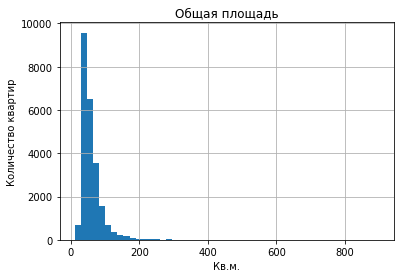

In [50]:
data['total_area'].plot(kind='hist', y ='total_area', bins=50, grid=True,\
           legend=False, title='Общая площадь') #строим гистограмму
plt.xlabel('Кв.м.') #задаем название оси икс 
plt.ylabel('Количество квартир') #задаем название оси игрик и выводим 
data['total_area'].describe() #выводим описательную статистику

Text(0.5, 0, 'Общая площадь')

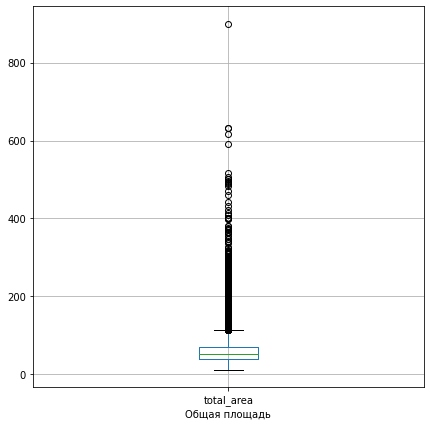

In [51]:
data.boxplot(column=['total_area'], figsize=(7,7), grid=True) #строим ящик с усами
plt.xlabel('Общая площадь') #задаем название оси икс и выводим 

Для анализа предлагаю взять значения которые находятся в диапазоне от 20 (как минимальный возможный размер квартиры) до 104 квадратных метров, сделаем срез:

Text(0, 0.5, 'Количество квартир')

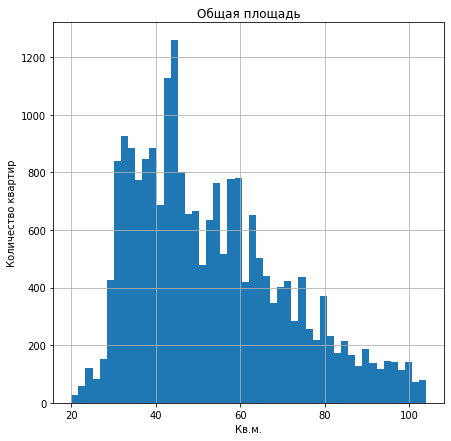

In [52]:
query = data.query('total_area <= 104 and total_area >= 20') #создаем переменную и делаем срез по вышеуказанным условиям
query.plot(kind='hist', y ='total_area', bins=50, grid=True,\
           legend=False, figsize=(7, 7), title='Общая площадь')
#строим гистограмму с сеткой, без легенды и прописываем название 
plt.xlabel('Кв.м.') #задаем название оси икс 
plt.ylabel('Количество квартир') #задаем название оси игрик и выводим 

На основе вышеуказанной гистограммы можно сделать вывод, что самой частой площадью квартиры является площадь в диапазоне от 30 до 45 квадартных метров.

count    23650.000000
mean        34.282490
std         21.688895
min          2.000000
25%         18.400000
50%         30.300000
75%         42.600000
max        409.700000
Name: living_area, dtype: float64

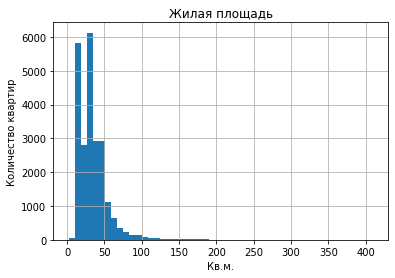

In [53]:
data['living_area'].plot(kind='hist', y ='living_area', bins=50, grid=True,\
           legend=False, title='Жилая площадь')
#строим гистограмму
plt.xlabel('Кв.м.') #задаем название оси икс 
plt.ylabel('Количество квартир') #задаем название оси игрик и выводим  
data['living_area'].describe() #выводим описательную статистику

Text(0.5, 0, 'Жилая площадь')

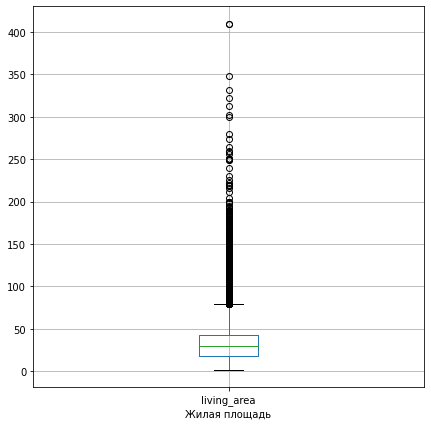

In [54]:
data.boxplot(column=['living_area'], figsize=(7,7), grid=True) #строим ящик с усами
plt.xlabel('Жилая площадь') #задаем название оси икс и выводим 

Видим, что основные значения находятся в диапазоне до 61 квадратных метров, сделаем срез:

Text(0, 0.5, 'Количество квартир')

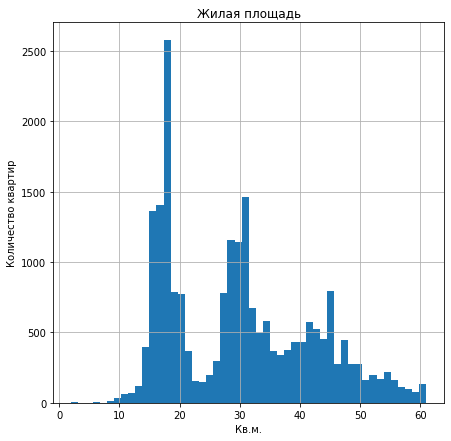

In [55]:
query = data.query('living_area <= 61') #создаем переменную и делаем срез по вышеуказанным условиям
query.plot(kind='hist', y ='living_area', bins=50, grid=True,\
           legend=False, figsize=(7, 7), title='Жилая площадь')
#строим гистограмму с сеткой, без легенды и прописываем название 
plt.xlabel('Кв.м.') #задаем название оси икс 
plt.ylabel('Количество квартир') #задаем название оси игрик и выводим 

На основе вышеуказанной гистограммы можно сделать вывод, что самой частой площадью жилой части квартиры является площадь в диапазоне от 15 до 18 и от 27 до 33 квадартных метров.

count    23650.000000
mean         9.552654
std          6.416640
min          0.000000
25%          6.300000
50%          9.000000
75%         11.427500
max        112.000000
Name: kitchen_area, dtype: float64

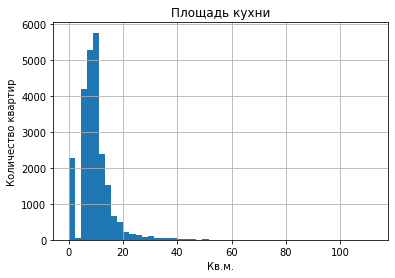

In [56]:
data['kitchen_area'].plot(kind='hist', y ='kitchen_area', bins=50, grid=True,\
           legend=False, title='Площадь кухни')
#строим гистограмму
plt.xlabel('Кв.м.') #задаем название оси икс 
plt.ylabel('Количество квартир') #задаем название оси игрик и выводим
data['kitchen_area'].describe() #выводим описательную статистику

Text(0.5, 0, 'Площадь кухни')

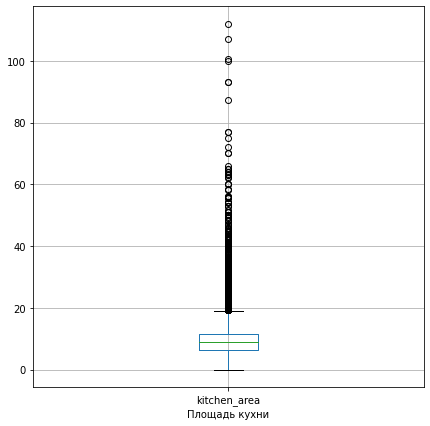

In [57]:
data.boxplot(column=['kitchen_area'], figsize=(7,7), grid=True) #строим ящик с усами
plt.xlabel('Площадь кухни') #задаем название оси икс и выводим

Видим, что основные значения находятся в диапазоне до 18 квадратных метров, исключая 0 значения, сделаем срез:

Text(0, 0.5, 'Количество квартир')

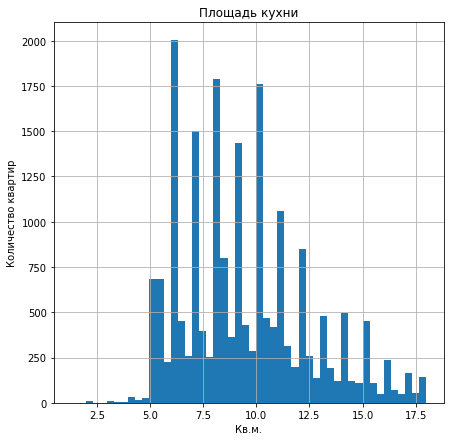

In [58]:
query = data.query('kitchen_area <= 18 and kitchen_area > 0') #создаем переменную и делаем срез по вышеуказанным условиям
query.plot(kind='hist', y ='kitchen_area', bins=50, grid=True,\
           legend=False, figsize=(7, 7), title='Площадь кухни')
#строим гистограмму с сеткой, без легенды и прописываем название 
plt.xlabel('Кв.м.') #задаем название оси икс 
plt.ylabel('Количество квартир') #задаем название оси игрик и выводим 

Как было сказано выше, большая доля квартир с 0 квадратными метрами обусловлена тем, что некоторые типы квартир не подразумевают в своем плане кухню или данные могли просто не указываться человеком, заполняющим информацию о квартире. В среднем частой площадью кухни является площадь в диапазоне от 5 до 12 квадартных метров.

**Промежуточный вывод:** В каждом из видов максимальный объем площади сильно отличается от средних значений. Но т.к. речь идет о недвижимости, то это обусловлено тем, что на рынке в основном находятся квартиры "эконом-класса" с соответствующей квадратурой, начиная от маленьких студий, заканчивая трехкомнатными квартирами.

Гистограммы жилой площади и площади кухни подтверждают, что самым распостраненным является жилье в диапазоне от 30 до 45 квадартных метров.

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

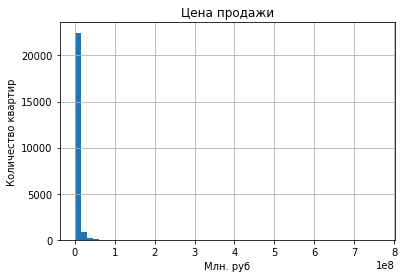

In [59]:
data['last_price'].plot(kind='hist', y ='last_price_m', bins=50, grid=True,\
                        legend=False, title='Цена продажи') #строим гистограмму
plt.xlabel('Млн. руб') #задаем название оси икс
plt.ylabel('Количество квартир') #задаем название оси игрик и выводим 
data['last_price'].describe() #выводим описательную статистику

Для удобства переведем значения в миллионы:

In [60]:
data['last_price_m'] = data['last_price']/1000000 #создаем новый столбец и делим все значения на миллион
data['last_price_m'].describe() #выводим описательную статистику

count    23650.000000
mean         6.541127
std         10.896399
min          0.012190
25%          3.400000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price_m, dtype: float64

Text(0.5, 0, 'Цена продажи')

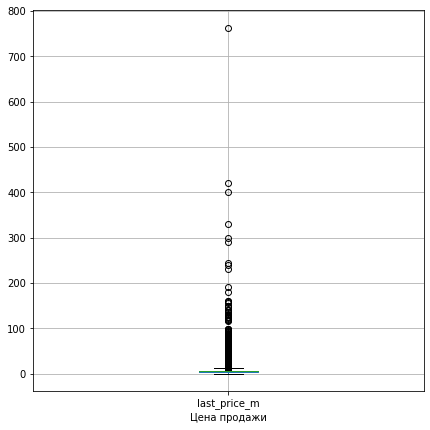

In [61]:
data.boxplot(column='last_price_m', figsize=(7,7), grid=True) #строим ящик с усами
plt.xlabel('Цена продажи') #задаем название оси икс и выводим

Видим, что основные значения находятся в диапазоне до 10 млн.руб., сделаем срез:

Text(0, 0.5, 'Количество квартир')

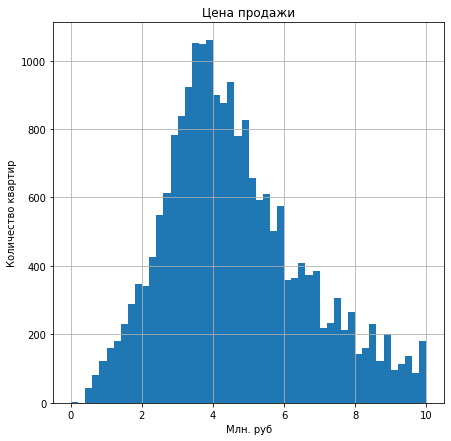

In [62]:
query = data.query('last_price_m <= 10') #создаем переменную и делаем срез по вышеуказанным условиям
query.plot(kind='hist', y ='last_price_m', bins=50, grid=True,\
                        legend=False, figsize=(7, 7), title='Цена продажи')
#строим гистограмму с сеткой, без легенды и прописываем название 
plt.xlabel('Млн. руб') #задаем название оси икс
plt.ylabel('Количество квартир') #задаем название оси игрик и выводим 

На основе вышеуказанной гистограммы можно сделать вывод, что самой частой ценой квартиры является сумма в диапазоне 3.5 - 4 млн. рублей.

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

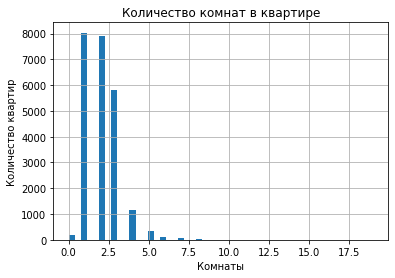

In [63]:
data['rooms'].plot(kind='hist', y ='rooms', bins=50, grid=True,\
           legend=False, title='Количество комнат в квартире') #строим гистограмму 
plt.xlabel('Комнаты') #задаем название оси икс
plt.ylabel('Количество квартир') #задаем название оси игрик и выводим 
data['rooms'].describe() #выводим описательную статистику

Text(0.5, 0, 'Количество комнат в квартире')

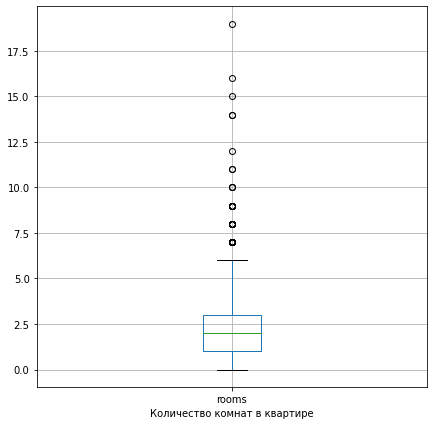

In [64]:
data.boxplot(column=['rooms'], figsize=(7,7), grid=True) #строим ящик с усами
plt.xlabel('Количество комнат в квартире') #задаем название оси икс и выводим

Видим, что основные значения находятся в диапазоне до 6 комнат, сделаем срез:

Text(0, 0.5, 'Количество квартир')

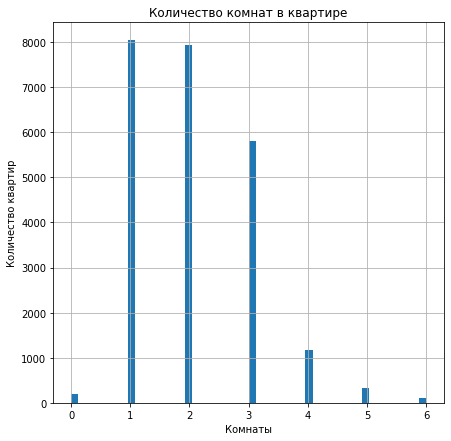

In [65]:
query = data.query('rooms <= 6') #создаем переменную и делаем срез по вышеуказанным условиям
query.plot(kind='hist', y ='rooms', bins=50, grid=True,\
           legend=False, figsize=(7, 7), title='Количество комнат в квартире')
#строим гистограмму с сеткой, без легенды и прописываем название 
plt.xlabel('Комнаты') #задаем название оси икс
plt.ylabel('Количество квартир') #задаем название оси игрик и выводим 

Наибольшее количество квартир состоит из 1 или 2-х комнат, далее количество снижается пропорционально росту количеству комнат. Так же можно заметить, что присутствует значение 0, вероятно оно относится к квартирам с открытой планировкой и квартирам-студиям.
Проверим данное утверждение.

In [66]:
print(range(len(data[data['rooms'] == 0]))) #посчитаем диапазон строк, в которых есть комнаты со значением 0
range(len(data.loc[((data['rooms'] == 0) & (data['open_plan'])) | ((data['rooms'] == 0) & (data['studio']))]))
#посчитаем диапозон строк, в которых комнаты со значением 0 и при этом они соответсвуют студиям и открытой планировке

range(0, 197)


range(0, 197)

Все верно, эти данные так же оставляем неизменными.

count    23650.000000
mean         2.699727
std          0.251785
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

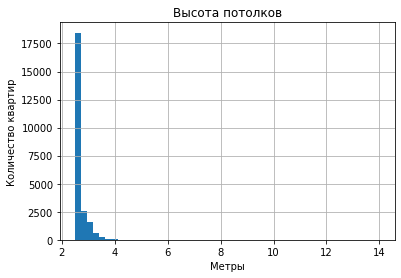

In [67]:
data['ceiling_height'].plot(kind='hist', y ='ceiling_height', bins=50, grid=True,\
           legend=False, title='Высота потолков') #строим гистограмму
plt.xlabel('Метры') #задаем название оси икс 
plt.ylabel('Количество квартир') #задаем название оси игрик и выводим 
data['ceiling_height'].describe() #выводим описательную статистику

Text(0.5, 0, 'Высота потолков')

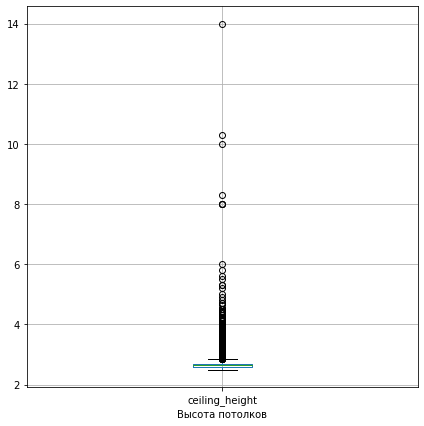

In [68]:
data.boxplot(column=['ceiling_height'], figsize=(7,7), grid=True) #строим ящик с усами
plt.xlabel('Высота потолков') #задаем название оси икс и выводим

Видим, что основные значения находятся в диапазоне до 2.8 метров, сделаем срез:

Text(0, 0.5, 'Количество квартир')

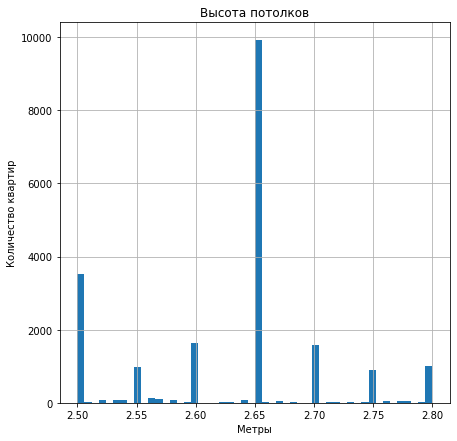

In [69]:
query = data.query('ceiling_height <= 2.8') #создаем переменную и делаем срез по вышеуказанным условиям
query.plot(kind='hist', y ='ceiling_height', bins=50, grid=True,\
           legend=False, figsize=(7, 7), title='Высота потолков')
#строим гистограмму с сеткой, без легенды и прописываем название 
plt.xlabel('Метры') #задаем название оси икс 
plt.ylabel('Количество квартир') #задаем название оси игрик и выводим 

Чаще всего строят квартиры с высотой потолков в 2,65 м, на втором месте потолки с высотой в 2,5 м.

count      23650
unique         4
top       Другой
freq       17326
Name: floor_type, dtype: object

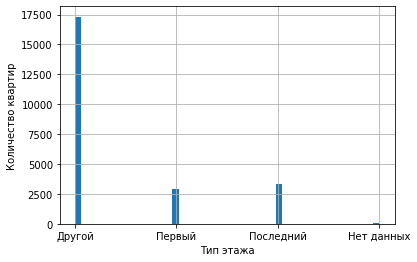

In [70]:
data['floor_type'].hist(bins=50) #строим гистограмму
plt.xlabel('Тип этажа') #задаем название оси икс
plt.ylabel('Количество квартир') #задаем название оси игрик и выводим 
data['floor_type'].describe() #выводим описательную статистику

График показывает очевидное разграничение, что количество квартир, находящихся не на 1 и не на последнем этаже сильно превышает количество вышеуказанных. Это связано с тем, что на рынке это самые непопулярные для продажи этажи, т.к. имеют некоторые особенности.

count    23650.000000
mean        10.637505
std          6.613891
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

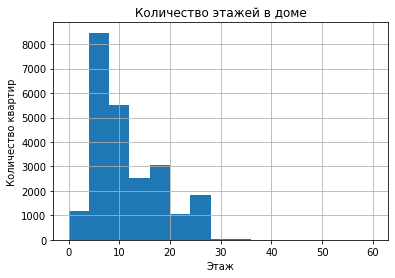

In [71]:
data['floors_total'].plot(kind='hist', y ='floors_total', bins=15, grid=True,\
           legend=False, title='Количество этажей в доме') #строим гистограмму
plt.xlabel('Этаж') #задаем название оси икс 
plt.ylabel('Количество квартир') #задаем название оси игрик и выводим 
data['floors_total'].describe() #выводим описательную статистику

Text(0.5, 0, 'Количество этажей в доме')

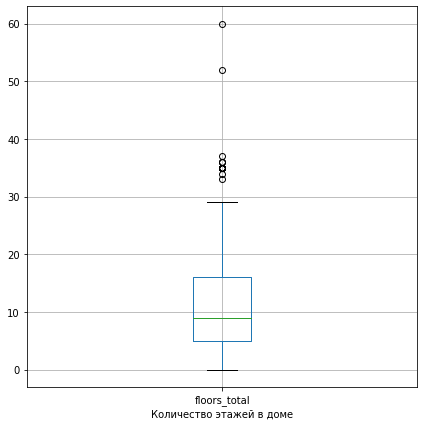

In [72]:
data.boxplot(column=['floors_total'], figsize=(7,7), grid=True) #строим ящик с усами
plt.xlabel('Количество этажей в доме') #задаем название оси икс и выводим

Видим, что основные значения находятся в диапазоне от 5 до 16 этажей, сделаем срез:

Text(0, 0.5, 'Количество квартир')

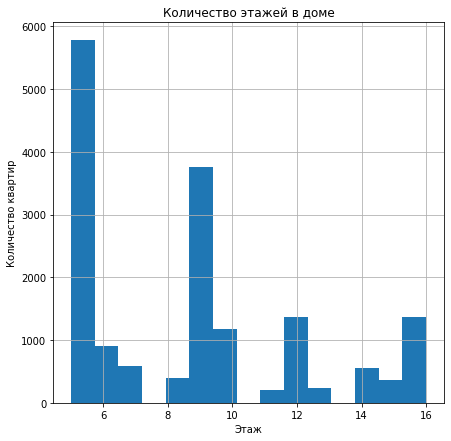

In [73]:
query = data.query('floors_total <= 16 and floors_total >= 5') #создаем переменную и делаем срез по вышеуказанным условиям
query.plot(kind='hist', y ='floors_total', bins=15, grid=True,\
           legend=False, figsize=(7, 7), title='Количество этажей в доме')
#строим гистограмму с сеткой, без легенды и прописываем название 
plt.xlabel('Этаж') #задаем название оси икс 
plt.ylabel('Количество квартир') #задаем название оси игрик и выводим 

Можем сделать вывод, что большинство квартир находятся в "пятиэтажках". 

count    23650.000000
mean     10889.429006
std       9635.531486
min          0.000000
25%       2242.000000
50%      11250.000000
75%      15247.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

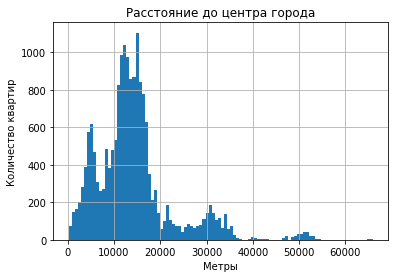

In [74]:
city_centers_nearest = data[data['city_centers_nearest'] != 0]  #создаем переменную и убираем 0 значения 
city_centers_nearest.plot(kind='hist', y ='city_centers_nearest', bins=100, grid=True,\
           legend=False, title='Расстояние до центра города') #строим гистограмму
plt.xlabel('Метры') #задаем название оси икс 
plt.ylabel('Количество квартир') #задаем название оси игрик и выводим 
data['city_centers_nearest'].describe() #выводим описательную статистику

Text(0.5, 0, 'Расстояние до центра города')

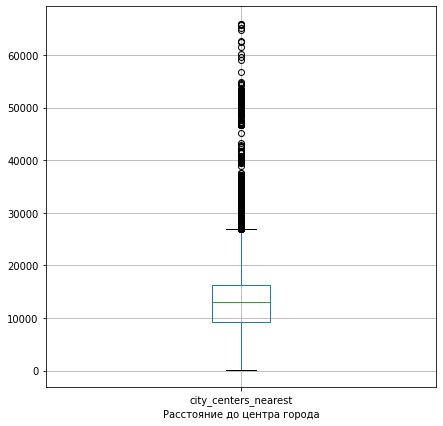

In [75]:
city_centers_nearest.boxplot(column=['city_centers_nearest'], figsize=(7,7), grid=True) #строим ящик с усами
plt.xlabel('Расстояние до центра города') #задаем название оси икс и выводим

Видим, что основные значения находятся в диапазоне до 20000 метров, уберем пустующие значения и сделаем срез:

Text(0, 0.5, 'Количество квартир')

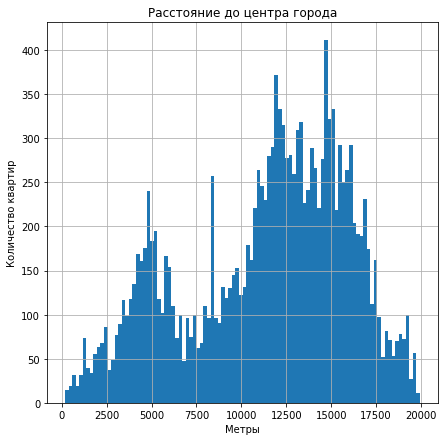

In [76]:
query = city_centers_nearest.query('city_centers_nearest <= 20000') 
#создаем переменную и делаем срез по вышеуказанным условиям
query.plot(kind='hist', y ='city_centers_nearest', bins=100, grid=True,\
           legend=False, figsize=(7, 7), title='Расстояние до центра города')
#строим гистограмму с сеткой, без легенды и прописываем название 
plt.xlabel('Метры') #задаем название оси икс 
plt.ylabel('Количество квартир') #задаем название оси игрик и выводим 

Проанализировав данные, видно, что квартиры продают в основном на достаточно большом отдалении от центра города. Примерно от 12 до 17 тысяч метров. Нулевые значения так же могут сказать о том, что возможно эти данные не указали, т.к. до ближайшего города большое количество километров и указывать это бессмысленно, об этом и так скажет название населенного пункта.

count    23650.000000
mean     22063.392812
std      16463.306970
min          0.000000
25%      10147.000000
50%      21868.000000
75%      34358.000000
max      84869.000000
Name: airports_nearest, dtype: float64

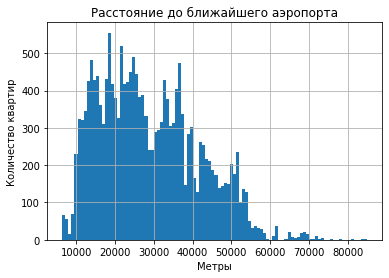

In [77]:
airports_nearest = data[data['airports_nearest'] != 0] #создаем переменную и убираем 0 значения 
airports_nearest.plot(kind='hist', y='airports_nearest', bins=100, grid=True,\
           legend=False, title='Расстояние до ближайшего аэропорта') #строим гистограмму
plt.xlabel('Метры') #задаем название оси икс 
plt.ylabel('Количество квартир') #задаем название оси игрик и выводим 
data['airports_nearest'].describe() #выводим описательную статистику

Text(0.5, 0, 'Расстояние до ближайшего аэропорта')

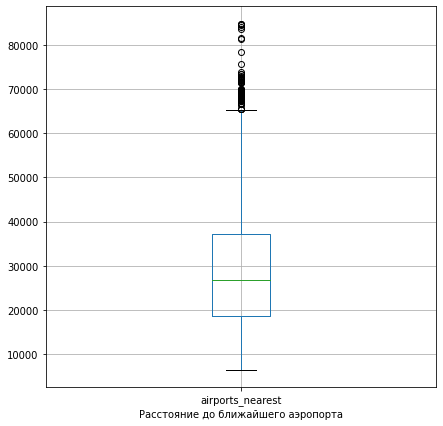

In [78]:
airports_nearest.boxplot(column=['airports_nearest'], figsize=(7,7), grid=True) #строим ящик с усами
plt.xlabel('Расстояние до ближайшего аэропорта') #задаем название оси икс и выводим

Видим, что основные значения находятся в диапазоне до 60000 метров и сделаем срез:

Text(0, 0.5, 'Количество квартир')

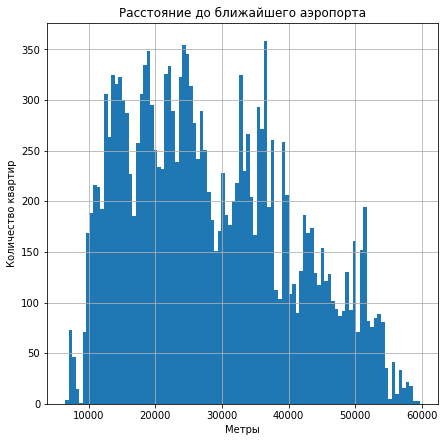

In [79]:
query = airports_nearest.query('airports_nearest <= 60000')
#создаем переменную и делаем срез по вышеуказанным условиям
query.plot(kind='hist', y='airports_nearest', bins=100, grid=True,\
           legend=False, figsize=(7, 7), title='Расстояние до ближайшего аэропорта')
#строим гистограмму с сеткой, без легенды и прописываем название 
plt.xlabel('Метры') #задаем название оси икс 
plt.ylabel('Количество квартир') #задаем название оси игрик и выводим 

Проанализировав данные, видно, что квартиры продают в основном на достаточно большом отдалении от аэропорта. Примерно от 10 до 40 тысяч метров. Нулевые значения так же могут сказать о том, что возможно эти данные не указали, т.к. до ближайшего аэропорта большое количество километров и указывать это бессмысленно.

count    23650.000000
mean       167.359789
std        306.832134
min          0.000000
25%          0.000000
50%          0.000000
75%        301.000000
max       3190.000000
Name: parks_nearest, dtype: float64

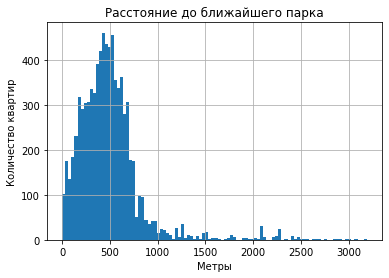

In [80]:
parks_nearest = data[data['parks_nearest'] != 0] #создаем переменную и убираем 0 значения 
parks_nearest.plot(kind='hist', y ='parks_nearest', bins=100, grid=True, \
           legend=False, title='Расстояние до ближайшего парка') #строим гистограмму
plt.xlabel('Метры') #задаем название оси икс 
plt.ylabel('Количество квартир') #задаем название оси игрик и выводим 
data['parks_nearest'].describe() #выводим описательную статистику

Text(0.5, 0, 'Расстояние до ближайшего парка')

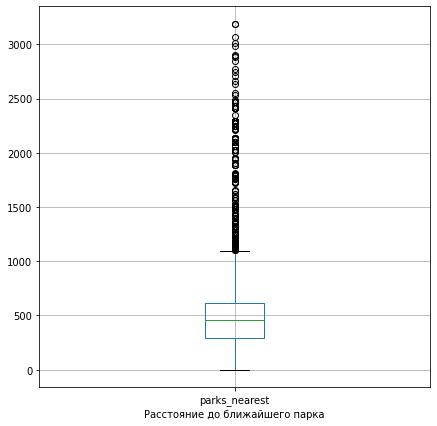

In [81]:
parks_nearest.boxplot(column=['parks_nearest'], figsize=(7,7), grid=True) #строим ящик с усами
plt.xlabel('Расстояние до ближайшего парка') #задаем название оси икс и выводим

Видим, что основные значения находятся в диапазоне до 800 метров и сделаем срез:

Text(0, 0.5, 'Количество квартир')

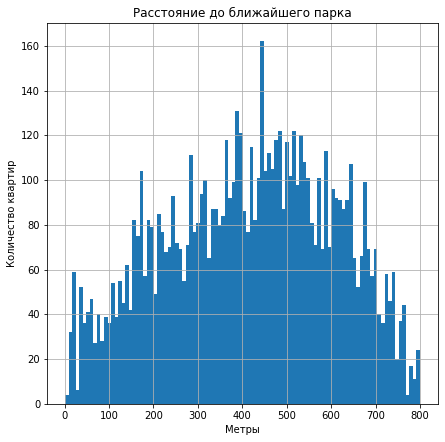

In [82]:
query = parks_nearest.query('parks_nearest <= 800') #создаем переменную и делаем срез по вышеуказанным условиям
query.plot(kind='hist', y ='parks_nearest', bins=100, grid=True, \
           legend=False, figsize=(7, 7), title='Расстояние до ближайшего парка')
#строим гистограмму с сеткой, без легенды и прописываем название 
plt.xlabel('Метры') #задаем название оси икс 
plt.ylabel('Количество квартир') #задаем название оси игрик и выводим 

Проанализировав данные, видно, что квартиры продают в основном в пешей доступности от парков и зон отдыха.

**Промежуточный итог:** Суммирая все вышесказанное, можно сделать вывод, что в основном на рынке находятся однокомнатные или двухкомнатные квартиры стоимость которых составялет 3.5 - 4 млн. рублей в пятиэтажном доме. 
Вероятно, квартира не будет находится на 1 или на последнем этаже из-за непопулярности данных предложений, будет иметь потолок 2,5-2,65 м и находится на достаточно большом отдалении от центра города и аэропортов, однако в пешей доступности от парков и зон отдыха.
Последние факторы, могут быть связаны с тем, что жители центра городов реже расстаются со своей жилплощадью, а близкое нахождение с аэоропортом может отпугивать потенциальных клиентов возможным ежедневным шумом.

Далее проанализируем день и месяц публикации объявлений:

count       23650
unique          7
top       Четверг
freq         4286
Name: exp_weekday, dtype: object

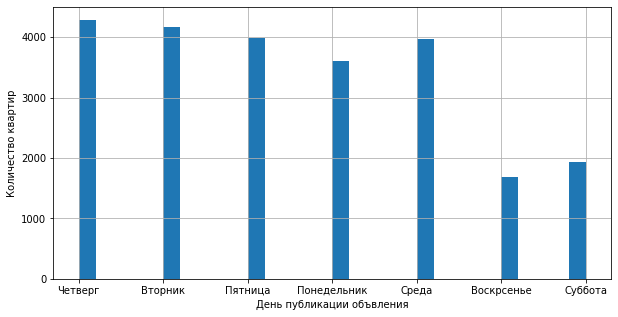

In [83]:
data['exp_weekday'].hist(bins=30, figsize=(10,5)) #строим гистограмму
plt.xlabel('День публикации объвления') #задаем название оси икс
plt.ylabel('Количество квартир') #задаем название оси игрик и выводим 
data['exp_weekday'].describe() #выводим описательную статистику

count       23650
unique         12
top       Февраль
freq         2639
Name: exp_month, dtype: object

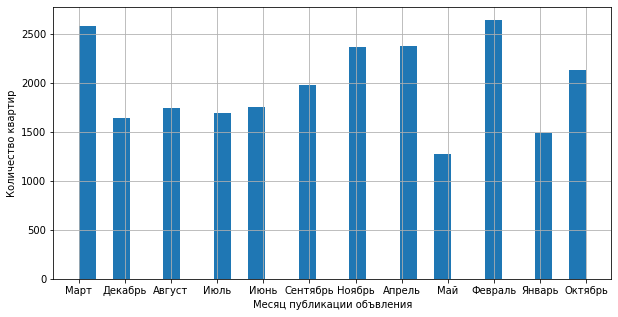

In [84]:
data['exp_month'].hist(bins=30, figsize=(10,5)) #строим гистограмму
plt.xlabel('Месяц публикации объвления') #задаем название оси икс
plt.ylabel('Количество квартир') #задаем название оси игрик и выводим 
data['exp_month'].describe() #выводим описательную статистику

**Промежуточный вывод:** Основная часть публикаций приходится на будний день (преимущественно Четверг) в Октябре-Ноябре или с Февраля по Апрель.

#### Изучение быстроты продажи квартиры

Этот параметр показывает, сколько дней «висело» каждое объявление.

count    23650.000000
mean       156.448964
std        213.564548
min          0.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

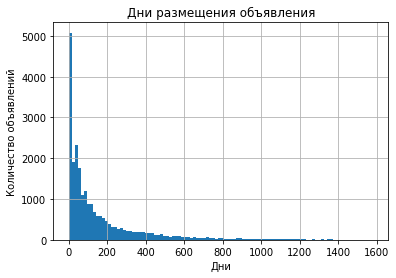

In [85]:
data['days_exposition'].plot(kind='hist', y ='days_exposition', bins=100, grid=True, legend=False,\
           title='Дни размещения объявления') #строим гистограмму
plt.xlabel('Дни') #задаем название оси икс 
plt.ylabel('Количество объявлений') #задаем название оси игрик и выводим
data['days_exposition'].describe() #выводим описательную статистику

Для начала нужно исключить 0 показания, которые означают, что квартира еще не продана и значения, не превыщащие 200 дней.

Text(0, 0.5, 'Количество объявлений')

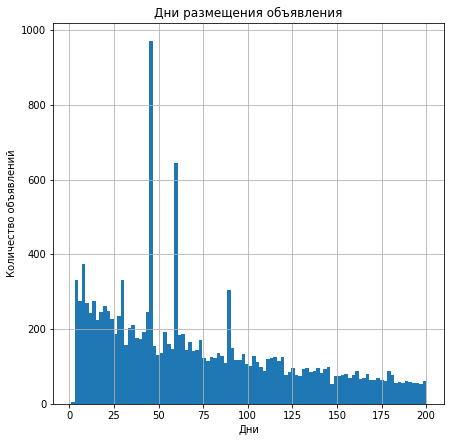

In [86]:
query = data.query('days_exposition > 0 and days_exposition <= 200') #создаем переменную и делаем срез по вышеуказанным условиям
query.plot(kind='hist', y ='days_exposition', bins=100, grid=True, legend=False,\
           figsize=(7, 7), title='Дни размещения объявления')
#строим гистограмму с сеткой, без легенды и прописываем название 
plt.xlabel('Дни') #задаем название оси икс 
plt.ylabel('Количество объявлений') #задаем название оси игрик и выводим 

Видим, что в целом видна тенденция к снижению числа квартир с ростом срока продажи. На графике есть выбивающиеся значения, посмотрим на их точные значения:

In [87]:
data['days_exposition'].value_counts().head(10) #выведем первые 10 значений по количеству дней снятия публикации

0     3180
45     879
60     538
7      234
30     208
90     203
4      174
3      158
5      152
14     148
Name: days_exposition, dtype: int64

Видим, что большее число квартир еще не продано, а остальные большие значения имеют четкие значения в 7, 30, 45, 60 и 90 дней.
Возможно это обусловлено правилами площадки, и объявления автоматически снимаются (хотя квартиры не проданы) после какого-то определенного срока. 
Проверим средние, медианные и минимальные и максимальные значения столбца, исключая 0 значения:

In [88]:
print(data['days_exposition'].mean()) #выведем среднее значение
print(data['days_exposition'].median()) #выведем медианное значение
data.loc[data['days_exposition'] != 0, 'days_exposition'].describe() 
#выводим описательную статистику с условием, что дни не равны 0 

156.4489640591966
73.0


count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медианное значение отличается от среднего ровно в два раза. 
На основе вышесказанного можно сделать вывод, что нормальным временем считается продажа от нескольких дней до примерно 7 месяцев, далее уже возможность продажи сильно снижается.
Необычайно большим сроком является продажа за 1580 дней, что равняется 4 годам, и самая быстрая продажа - за один день, что скорее является редкими значениями.
Быстрой продажей можно считать значение до полутора месяцев, долгая же продажа начинается примерно от года.


#### Факторы влияния на полную стоимость объекта

В данном исследовании нам необходимо выявить зависимость цены объекта от следующих факторов:
- общей площади;
- жилой площади;
- площади кухни;
- количество комнат;
- типа этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год);

и выяснить, какой из них влияет на цену больше всего.

Для анализа создадим срез corr, в котором уже будут отсутстовать сильно выбивающиеся значения факторов, посчитаем корреляцию для них и напишем функцию для построения всех графиков одновременно.

In [89]:
corr = data.query('last_price_m <= 10 and total_area <= 104 and total_area >= 20 and \
                  living_area <= 61 and kitchen_area <= 18 and kitchen_area > 0 and rooms <= 6')
#делаем срез 
corr_table = corr[['last_price_m', 'total_area', 'living_area', 'kitchen_area', 'rooms','exp_year']].corr()
#считаем корелляцию
corr_table.columns=['Цена квартиры','Общая площадь','Жилая площадь','Площадь кухни','Количество комнат','Год размещения объявления']
#переименовывем столбцы
factors_name = {'last_price_m':'Цена квартиры','total_area':'Общая площадь', 'living_area':'Жилая площадь', \
                'kitchen_area':'Площадь кухни','rooms':'Количество комнат','exp_year':'Год размещения объявления'}
corr_table = corr_table.rename(index = factors_name) # переименовываем строки
corr_table #выводим таблицу

,Цена квартиры,Общая площадь,Жилая площадь,Площадь кухни,Количество комнат,Год размещения объявления
Цена квартиры,1.000000,0.640734,0.505755,0.443304,0.391968,0.031780
Общая площадь,0.640734,1.000000,0.906733,0.371053,0.802720,-0.043244
Жилая площадь,0.505755,0.906733,1.000000,0.063688,0.911184,-0.026511
Площадь кухни,0.443304,0.371053,0.063688,1.000000,-0.063956,-0.037245
Количество комнат,0.391968,0.802720,0.911184,-0.063956,1.000000,-0.021002
Год размещения объявления,0.031780,-0.043244,-0.026511,-0.037245,-0.021002,1.000000


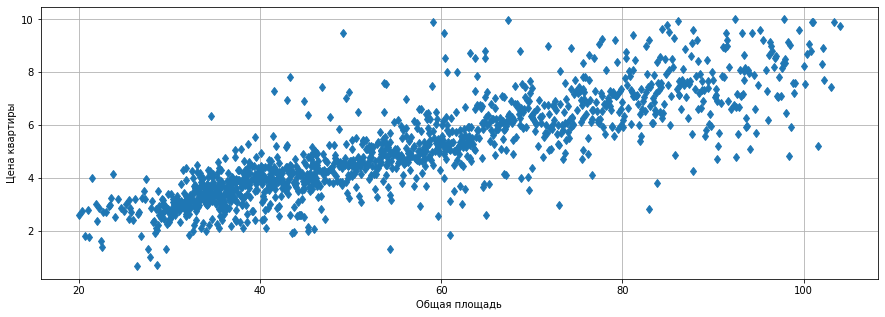

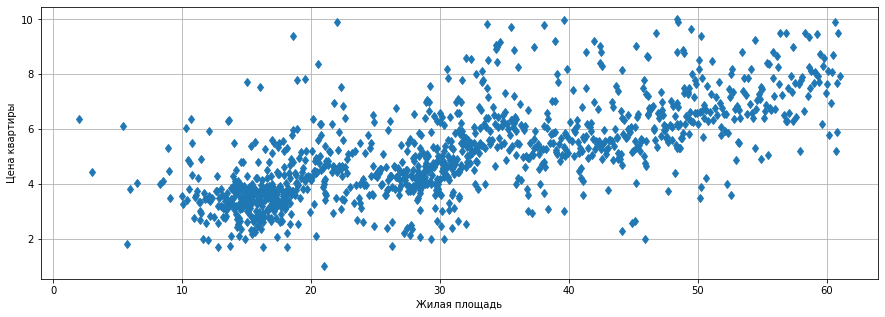

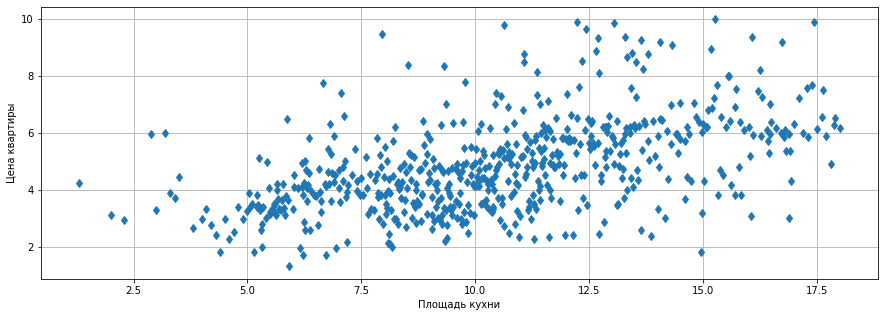

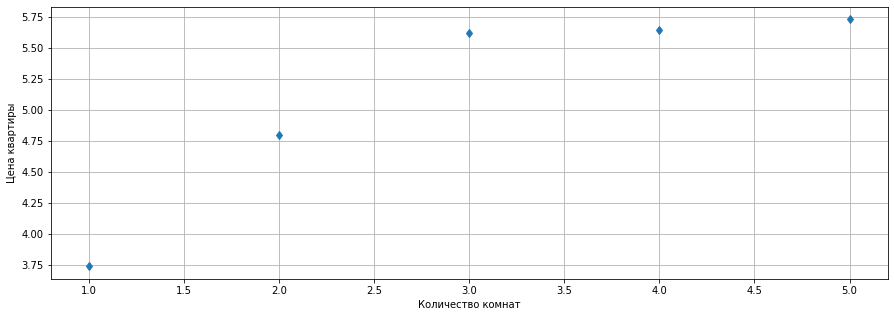

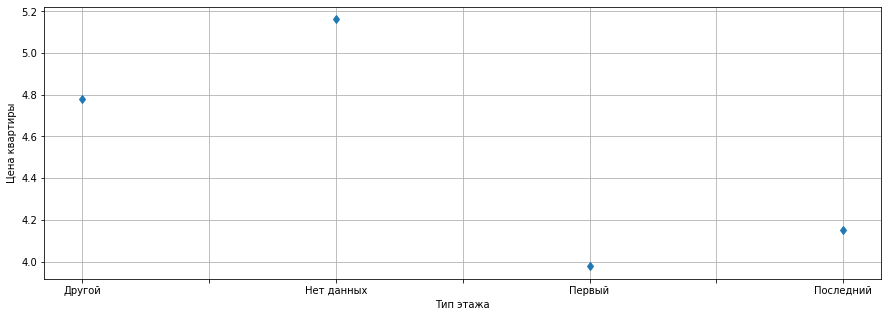

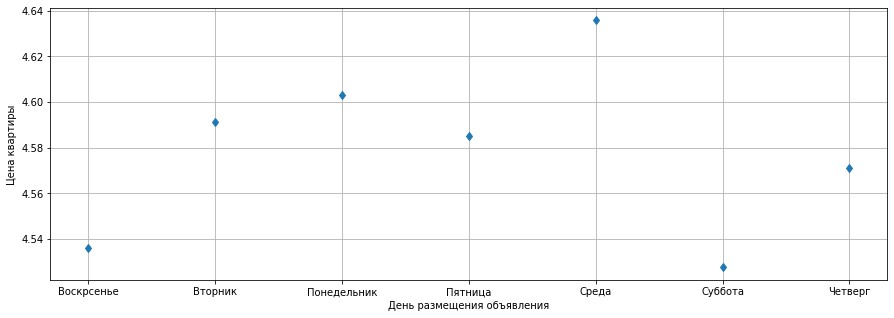

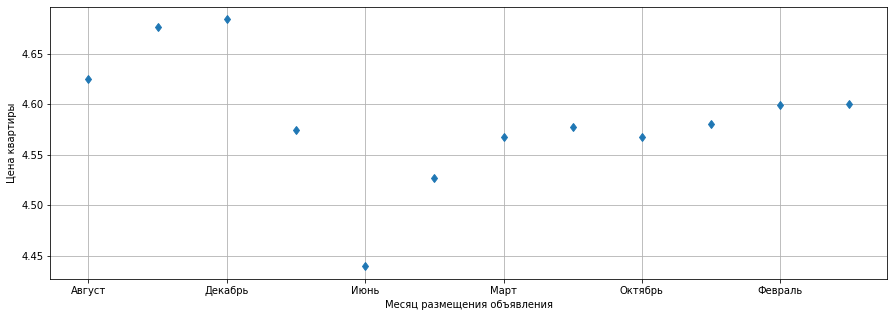

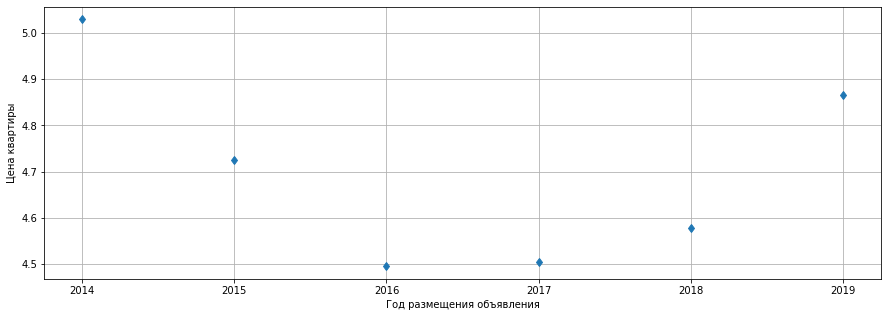

In [90]:
def create_pivot (corr, factors): #создадим функцию 
    for factor in factors: #где значение столбца из списка столбцов
        pivot = corr.pivot_table(index=factor, values='last_price_m')
        #будет входить в сводную таблицу со значением последней цены в миллионах,
        pivot.plot(style='d', grid=True, figsize=(15, 5), legend=False) #строить график на ее основе
        plt.xlabel(factors_name[factor]) #и задавать название оси икс как значение справочника
        plt.ylabel('Цена квартиры')
factors = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'exp_weekday', 'exp_month', 'exp_year']
#переменная со значениями столбцов
factors_name = {'total_area':'Общая площадь', 'living_area':'Жилая площадь', 'kitchen_area':'Площадь кухни', \
                'rooms':'Количество комнат', 'floor_type':'Тип этажа', 'exp_weekday':'День размещения объявления', \
                'exp_month':'Месяц размещения объявления', 'exp_year':'Год размещения объявления'}
#справочник для названий оси
create_pivot(corr, factors) #используем функцию

**Вывод:** На основе графиков и расчетов можно сделать вывод, что самое большое влияние на цену имеют два фактора - общая и жилая площади. Цена увеличивается пропорционально росту площади. Гораздо меньше связи с ростом площади кухни из-за недостатка данных или из-за того, что данный фактор не является ключевым при выборе квартиры. Так же есть небольшая зависимость от количества комнат -  чем больше комнат, тем цена выше (но с 6 комнаты начинается небольшое снижение). 
Самыми дешевыми предложениями являюся квартиры на первых и последних этажах.

Дата размещения публикации никак не влияет на стоимость объекта, но мы можем сделать вывод, что пик продаж в денежном эквиваленте приходится ну будние дни (особенно среда) в Апреле, Ноябре, Июле и Декабре. Самым неплатежеспособным месяцем стал Июнь.
При анализе года размещения пик цен наблюдается в 2014 году, который резко снижался до 2017 года, а затем снова пошел наверх.

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Для этого нужно определить самые многочисленные населенные пункты по количетсву объявлений:

In [91]:
top_local_name = data.pivot_table(index='locality_name', values='price_square_meter', aggfunc=['count', 'mean'])\
    .sort_values(by=('count','price_square_meter') , ascending=False).head(10)
#создаем переменную, в которой формируется сводная таблицу по названию населенного пункта и средней суммы за квадратный метр, 
#считаем количество по населенному пункту и среднее значение, сортируем по убыванию и сохраняем первые 10 значений
top_local_name = top_local_name.droplevel(0, axis=1).rename_axis(None, axis=1).reset_index()
#убираем мультииндексы
top_local_name.columns=['Название населенного пункта', 'Количество объявлений', 'Средняя сумма за квадратный метр']
#переименовываем столбцы
top_local_name #выводим получившующую таблицу

,Название населенного пункта,Количество объявлений,Средняя сумма за квадратный метр
0,Санкт-Петербург,15721,114849.008793
1,поселок Мурино,556,85681.762572
2,поселок Шушары,440,78677.364318
3,Всеволожск,398,68654.473970
4,Пушкин,369,103125.819377
5,Колпино,338,75424.579112
6,поселок Парголово,327,90175.913089
7,Гатчина,307,68746.146515
8,деревня Кудрово,299,92473.547559
9,Выборг,237,58141.909325


Теперь выделим среди данных значений максимальную и минимальную цену:

In [92]:
top_local_name.style.format({'Средняя сумма за квадратный метр':'{:.2f}'})\
.highlight_max(color='firebrick', subset='Средняя сумма за квадратный метр')\
.highlight_min(color='mediumaquamarine', subset='Средняя сумма за квадратный метр')
#красим минимальное значение в столбце зеленым цветом
#округляем значения последнего столбца до 2 цифр после запятой 
#красим максимальное значение в столбце красным цветом

,Название населенного пункта,Количество объявлений,Средняя сумма за квадратный метр
0,Санкт-Петербург,15721,114849.01
1,поселок Мурино,556,85681.76
2,поселок Шушары,440,78677.36
3,Всеволожск,398,68654.47
4,Пушкин,369,103125.82
5,Колпино,338,75424.58
6,поселок Парголово,327,90175.91
7,Гатчина,307,68746.15
8,деревня Кудрово,299,92473.55
9,Выборг,237,58141.91


#### Вычислите среднюю цену каждого километра в Санкт-Петербурге

Для расчета выделим в отдельную переменную все данные по Санкт-Петербургу, в которых указано расстояние до центра города:

In [93]:
local_spb = data[(data['locality_name'] == 'Санкт-Петербург')& (data['distance'] != 0)]
#создаем переменную с условием, где город только Санкт-Петербург, а расстояние в километрах не равно 0
pivot_local_spb = local_spb.pivot_table(index='distance', values='last_price', aggfunc = 'median')\
.rename_axis(None, axis=1).reset_index()
#строим по предыдущей переменной сводную таблицу с медианным значением цены за квартиру и убираем мультииндексы
pivot_local_spb.columns=['Километры до центра города', 'Средняя цена за квартиру'] #переименовываем столбцы
pivot_local_spb #выводим получившующую таблицу

,Километры до центра города,Средняя цена за квартиру
0,1,11750000.0
1,2,10835000.0
2,3,9500000.0
3,4,8500000.0
4,5,9900000.0
5,6,8920262.0
6,7,8005000.0
7,8,7500000.0
8,9,6500000.0
9,10,5000000.0


Выявим зависимость стоимости от количества километров:

Text(0, 0.5, 'Средняя стоимость предложения')

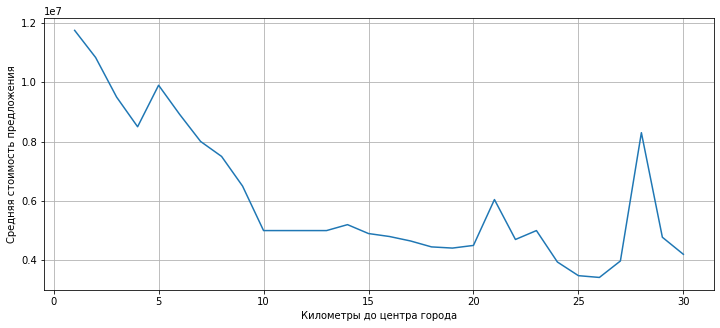

In [94]:
pivot_local_spb.plot(x='Километры до центра города', y='Средняя цена за квартиру', grid=True, figsize=(12, 5), legend=False)
#строим график на основе рассчитанных выше данных
plt.ylabel('Средняя стоимость предложения') #задаем название оси игрик и выводим 

На основании графика можно сделать вывод, что условным "центром" города Санкт-Петербург является расстояние до 10 км и чем ближе к нему, тем дороже явлеятся недвжижимость. 
Далее наблюдается снижение стоимости недвижимости вплоть до резкого повышения в сегменте 28 км, возможно там находится какой-то частный сектор в черте города.

### Общий вывод

Изначальная цель проекта  — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости, и ответить на вопросы:
- Как быстро продавались квартиры?
- Какие факторы больше всего влияют на общую (полную) стоимость объекта?
- Какие населённые пункты с самой высокой и низкой стоимостью квадратного метра?
- Как стоимость объектов зависит от расстояния до центра города?
Изучив основную информацию в датафрейме, было выполнено преобразование пустых значений в данных:
1. Удалось заполнить пустые значения в столбце `is_apartment` значением False, исходя из логики, что так много квартир не могут быть апартаментами, и исходя из того, что заполнение данных могло быть проигнорировано, по причине, что квартира не является апартаментами.
2. В столбце `ceiling_height` были заменены аномально большие значения, с допущением, что поле неверно было заполнено (без учета единиц измерения), с помощью деления на 10. Низкие (меньше 2,5 метров) и пустые значения были заполнены медианной.
3. Значения столбцов `parks_nearest`, `ponds_nearest`, `balcony`, `airports_nearest`, `cityCenters_nearest`, `ponds_around3000`, `parks_around3000`, `days_exposition` имеют пустые значения, т.к. квартира в принципе может не иметь балкона, парка, аэропорта и т.д. Это же касается `days_exposition`, т.к. это дни от публикации до снятия, это может означать, что объявление не снято. В данных столбцах значения могут быть пустыми и такие пропуски следует заменить на 0. Так же 0 пришлось заполнить пустые значения столбца `kitchen_area`, т.к. некоторые квартиры имеют открытую планировку или являются студией, которая не предусматривает определенный размер кухни на плане, а так же могли быть просто не указаны при заполнении.
4. Нет никакой зависимости количества этажей в `floors_total` от чего бы то ни было, поэтому значения так же были заменены на 0.
5. Значения в столбце `living_area` уже нельзя заменить 0, т.к. это ключевая информация о недвжижимости и жилая площадь, вероятно, присутствует в каждой квартире. Пустые значения были заполнены медианным значением, в зависимости от количества комнат. Это привело к тому, что сумма площадей кухни и жилой зоны превышали общую, чего быть не может. Эти значения были преобразованы так, чтобы не превыщать общую площадь.
6. Строки, с пустыми значением в `locality_name` были удалены, т.к. заменить их невозможно, а без знания местонахождения, данные о таких объявлениях не имеют смысла.

Пропуски и аномальные данные из предоставленного csv-файла можно объяснить наиболее частыми причинами:

Человеческий фактор: Ошибки ввода данных, несоответсвие полей конкретному объекту недвижимости.

Технические проблемы: Возможны сбои с оборудованием или программным обеспечением для сбора данных. 

После избавления пропусков и выбивающихся значений было осуществленно изменение типов данных:

Наименования столбцов были приведены к общему "змеиному" регистру, столбец, содержащий дату публикации был приведен к удобному формату даты, а столбцы, содержащие в себе значения целого числа, были изменены с типа с плавающей точки.

Дубликатов в данных обнаружено не было, однако присутствовало некорректное заполнение названий населенных пунктов. В ходе исследования были выделены 6 групп видов названий населенных пунктов:
1. Город (в них только названия)
2. Деревня
3. Поселок (или поселок станции, поселок при железнодорожной станции, коттеджный поселок)
4. Поселок городского типа (или посёлок городского типа, городской поселок)
5. Садоводческое некоммерческое товарищество (или садовое товарищество)
6. Село

Все названия были приведены к общему виду.

Данную проблему можно решить запретом вольного заполнения названия, а предлагать пользователям выпадающий список из унифицированных названий.

Далее были рассчитаны и добавлены в таблицу следующие данные:
цена одного квадратного метра
- день публикации объявления;
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры;
- расстояние в км до центра города.

И на основе уже дополненных данных был выполнен исследовательский анализ данных с использованием графиков и теперь мы сможем ответить на вопросы, заданные в начале проекта.
В основном на рынке находятся однокомнатные или двухкомнатные квартиры от 30 до 45 квадартных метров, стоимость которых составялет 3.5 - 4 млн. рублей в пятиэтажном доме. 
Вероятно, квартира не будет находится на 1 или на последнем этаже из-за непопулярности данных предложений,  будет иметь потолок 2,5-2,65 м и находится на достаточно большом отдалении от центра города и аэропортов, однако в пешей доступности от парков и зон отдыха.
Последние факторы, могут быть связаны с тем, что жители центра городов реже расстаются со своей жилплощадью, а близкое нахождение с аэоропортом может отпугивать потенциальных клиентов возможным ежедневным шумом.
Наибольшее количество квартир состоит из 1 или 2-х комнат, далее количество снижается пропорционально росту количеству комнат. Так же можно заметить, что присутствует значение 0, вероятно оно относится к квартирам с открытой планировкой и квартирам-студиям.
Анализ времени публикаций показал, что основная часть приходится на будний день (преимущественно Четверг) в Октябре-Ноябре или с Февраля по Апрель.


- Как быстро продавались квартиры?

Нормальным временем считается продажа от нескольких дней до примерно 7 месяцев, далее уже возможность продажи сильно снижается.
Необычайно большим сроком является продажа за 1580 дней, что равняется 4 годам, и самая быстрая продажа - за один день, что скорее является редкими значениями.
Быстрой продажей можно считать значение до полутора месяцев, долгая же продажа начинается примерно от года.

- Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Самое большое влияние на цену имеют два фактора - общая и жилая площади. Цена увеличивается пропорционально росту площади. Гораздо меньше связи с ростом площади кухни из-за недостатка данных или из-за того, что данный фактор не является ключевым при выборе квартиры. Так же есть небольшая зависимость от количества комнат -  чем больше комнат, тем цена выше (но с 6 комнаты начинается небольшое снижение). 
Самыми дешевыми предложениями являюся квартиры на первых и последних этажах.

Дата размещения публикации никак не влияет на стоимость объекта, но мы можем сделать вывод, что пик продаж в денежном эквиваленте приходится ну будние дни (особенно среда) в Апреле, Ноябре, Июле и Декабре. Самым неплатежеспособным месяцем стал Июнь.
При анализе года размещения пик цен наблюдается в 2014 году, который резко снижался до 2017 года, а затем снова пошел наверх.
- Какие населённые пункты с самой высокой и низкой стоимостью квадратного метра?

Самую дорогу сумму за квадратный метр из 10 населенных пунктов с наибольшим числом числом объявлений имеет город Санкт-Петербург, а самые дешевые квартиры в этом топе с конца возглавил город Выборг.
- Как стоимость объектов зависит от расстояния до центра города?

На основании графика можно сделать вывод, что условным "центром" города Санкт-Петербург является расстояние до 10 км и чем ближе к нему, тем дороже явлеятся недвжижимость. 
Далее наблюдается снижение стоимости недвижимости вплоть до резкого повышения в сегменте 28 км, возможно там находится какой-то частный сектор в черте города.